<a href="https://colab.research.google.com/github/quantum-mechanics405/Forming-files/blob/main/ML_6_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Normalization, Flatten
from tensorflow.keras.utils import to_categorical

In [41]:
# Step 1: Import MNIST Data
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

# Step 2: Normalize the data
X = X / 255.0

# Step 3: Shuffle the data
# X, y = np.shuffle(X, y, random_state=42)

# Step 4: Divide the data into training, validation, and testing
# Step 4: Divide the data into training, validation, and testing
X_train = X[:55000].astype(np.float32)
y_train = y[:55000].astype(np.int8)
X_val = X[55000:60000].astype(np.float32)
y_val = y[55000:60000].astype(np.int8)
X_test = X[60000:].astype(np.float32)
y_test = y[60000:].astype(np.int8)


In [37]:
y_test.dtypes

dtype('int8')

#1. Logistic regression

Cross-validation scores: [0.9148031  0.91703486 0.91294387]
Mean CV score: 0.9149


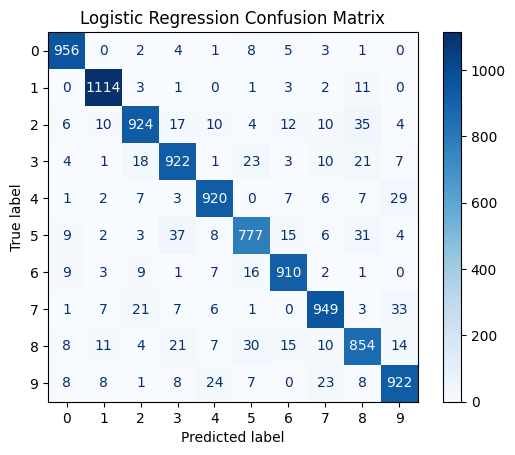

In [45]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 6: Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=3)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean CV score: {np.mean(cv_scores):.4f}')

# Step 7: Evaluate the model on the validation set
y_val_pred = model.predict(X_test)

# Step 8: Generate the confusion matrix
cm = confusion_matrix(y_test, y_val_pred)

# Step 9: Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [46]:
print(X_train.shape)

(55000, 784)


#2. Decision Tree Classifier


Validation Accuracy: 0.8912
Test Accuracy: 0.8793


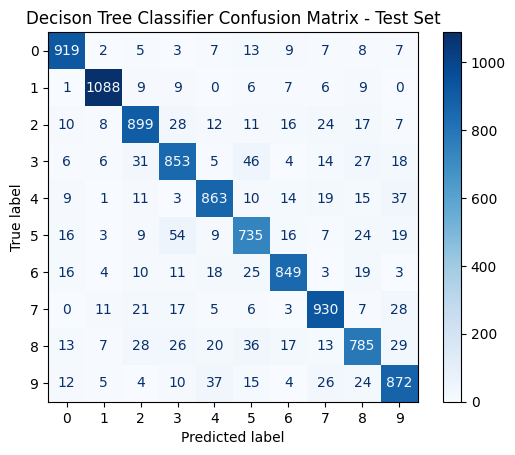

In [47]:
from sklearn.tree import DecisionTreeClassifier
# Step 4: Create and train the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 5: Evaluate the model on the validation set
y_val_pred = clf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.4f}')

# Step 6: Evaluate the model on the test set
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Step 7: Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Step 8: Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Decison Tree Classifier Confusion Matrix - Test Set")
plt.show()

#3. Random Forest Classifier


Test Accuracy: 0.9695


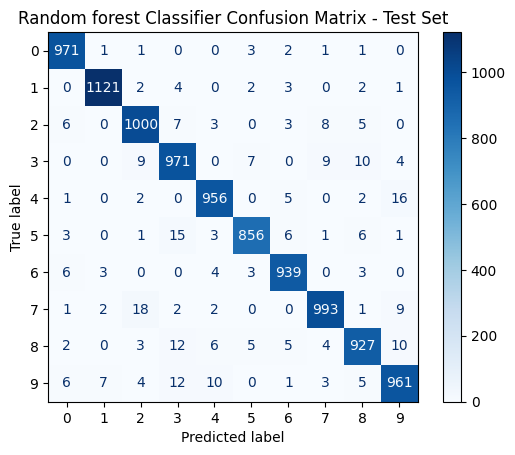

In [48]:
from sklearn.ensemble import RandomForestClassifier
# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Random forest Classifier Confusion Matrix - Test Set")
plt.show()

#4. Support Vector Classifier

Test Accuracy: 0.9844


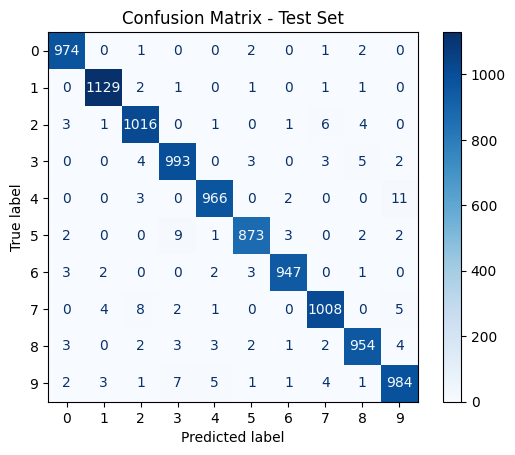

In [49]:
from sklearn.svm import SVC
# Train an SVC model
svc_clf = SVC(kernel='rbf', C=10, gamma='scale', random_state=42)
svc_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = svc_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Test Set")
plt.show()

#5. DNN


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Normalization, Flatten, Input
from tensorflow.keras.utils import to_categorical

# Assuming X_train, y_train, X_val, y_val, and X_test have been defined as per previous discussions

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)

# Step 5: Define model parameters
num_layers = 3
num_neurons = 500

# Step 6: Create the neural network model
model = Sequential(tf.keras.layers.Flatten(input_shape=[28, 28]))

# Use Input layer to specify input shape directly
model.add(Input(shape=(28, 28)))

# Add flatten layer to convert 28x28 images into a vector of shape 784
model.add(Flatten())

# Create and add normalization layer
normalization_layer = Normalization()
normalization_layer.adapt(X_train)  # Fit the normalization layer to the training data
model.add(normalization_layer)

# Add dense layers with He initialization and ReLU activation
for _ in range(num_layers):
    model.add(Dense(num_neurons, activation='relu', kernel_initializer='he_normal'))

# Add output layer with softmax activation
model.add(Dense(10, activation='softmax'))

# Step 7: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 8: Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Step 9: Evaluate the model on the test set
y_test_pred = model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred_classes)  # Use y_test directly
print(f'Test Accuracy: {accuracy:.4f}')

# Step 10: Generate the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_test_pred_classes)  # Use y_test directly

# Step 11: Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Test Set")
plt.show()


#6. CNN